[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter the target website URL: https://store.steampowered.com/
Enter the number of top keywords to display (e.g., 2, 5, 10, 50): 4


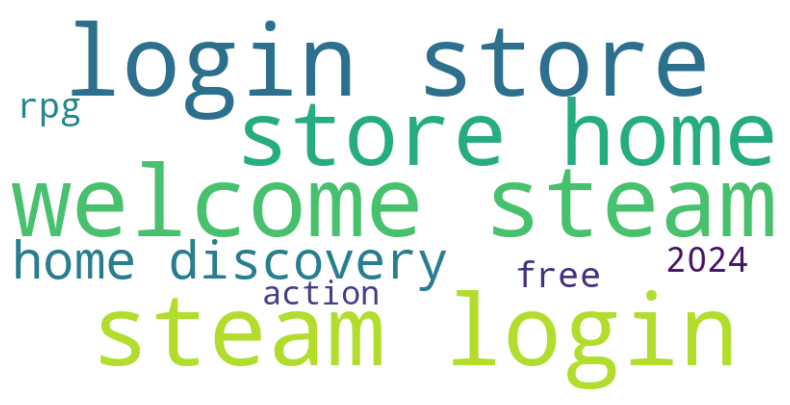


Top 4 Keywords from Target Website:
free: 0.3553
rpg: 0.3553
2024: 0.3441
action: 0.2989

Suggested Different Keywords for SEO (Top 4):
analysis
applications
insights
market

Suggested Long-Tail Keywords (Top 4):
Best practices for free
How to use 2024 in daily life
Top tips for rpg
Future trends in free

Prioritized Keywords by Value and Competitive Landscape (Top 4):
rpg: Score=0.3553, Search Volume=9028, Competition=0.26
2024: Score=0.3441, Search Volume=8493, Competition=0.77
free: Score=0.3553, Search Volume=1675, Competition=0.12
action: Score=0.2989, Search Volume=8507, Competition=0.96


In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Function to extract text from a web page
def extract_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup.get_text()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the webpage: {e}")
        return ""

# Function to clean and tokenize text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text.lower())
    return [word for word in words if word not in stop_words and len(word) > 2]

# Function to compute TF-IDF
def compute_tfidf(corpus):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    terms = vectorizer.get_feature_names_out()
    return tfidf_matrix, terms

# Function to extract top keywords from the TF-IDF matrix
def extract_top_keywords(tfidf_matrix, terms, top_n=5):
    sums = tfidf_matrix.sum(axis=0)
    keyword_freq = [(terms[i], sums[0, i]) for i in range(sums.shape[1])]
    keyword_freq = sorted(keyword_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return keyword_freq

# Function to generate n-grams
def generate_ngrams(text, n):
    words = text.split()
    ngrams = Counter(zip(*[words[i:] for i in range(n)])).items()
    return [' '.join(ngram) for ngram, _ in ngrams]

# Function to plot a word cloud for keywords
def plot_wordcloud(keywords):
    word_freq_dict = {word: score for word, score in keywords}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Function to suggest different keywords
def suggest_different_keywords(top_keywords, num_suggestions):
    # Sample different keywords (can be expanded based on requirements)
    different_keywords = [
        'innovation', 'trends', 'expertise', 'guide', 'strategies',
        'technology', 'applications', 'solutions', 'insights', 'research',
        'development', 'market', 'future', 'analysis', 'opportunities'
    ]

    # Remove top keywords from suggestions
    different_keywords = [kw for kw in different_keywords if kw not in [kw[0] for kw in top_keywords]]

    # Randomly select the specified number of different keywords
    suggested_keywords = random.sample(different_keywords, min(num_suggestions, len(different_keywords)))
    return suggested_keywords

# Function to generate long-tail keywords
def generate_long_tail_keywords(top_keywords, num_suggestions):
    long_tails = []
    for keyword in top_keywords:
        long_tails.append(f"How to use {keyword[0]} in daily life")
        long_tails.append(f"Best practices for {keyword[0]}")
        long_tails.append(f"Top tips for {keyword[0]}")
        long_tails.append(f"Understanding {keyword[0]} and its benefits")
        long_tails.append(f"Future trends in {keyword[0]}")

    # Randomly select the specified number of unique long-tail keywords
    long_tail_suggestions = random.sample(long_tails, min(num_suggestions, len(long_tails)))
    return long_tail_suggestions

# Function to simulate keyword value and competition
def simulate_keyword_data(top_keywords):
    simulated_data = []
    for keyword, score in top_keywords:
        search_volume = random.randint(100, 10000)  # Mock search volume
        competition = random.uniform(0.1, 1.0)  # Mock competition score (0-1 scale)
        simulated_data.append((keyword, score, search_volume, competition))
    return simulated_data

# Function to prioritize keywords by value and competitive landscape
def prioritize_keywords(simulated_data, num_suggestions):
    # Sort keywords based on a custom score (value - competition * value)
    prioritized = sorted(simulated_data, key=lambda x: x[2] - (x[3] * x[2]), reverse=True)
    return prioritized[:num_suggestions]

# Main function to analyze keywords and plot word cloud
def seo_keyword_suggestions(target_url, top_n):
    # Extract and clean text for the target website
    target_text = extract_text_from_url(target_url)
    target_cleaned = clean_text(target_text)
    target_corpus = [' '.join(target_cleaned)]

    # Compute TF-IDF for the target website
    tfidf_matrix, terms = compute_tfidf(target_corpus)

    # Extract top N keywords from the target website using TF-IDF
    top_keywords = extract_top_keywords(tfidf_matrix, terms, top_n)

    # Generate n-grams and count frequencies
    ngram_list = generate_ngrams(' '.join(target_cleaned), 2)  # Example for bigrams
    ngram_freq = Counter(ngram_list).most_common(5)  # Get top 5 bigrams

    # Combine TF-IDF keywords and n-grams
    combined_keywords = top_keywords + ngram_freq

    # Plot word cloud for the combined keywords
    plot_wordcloud(combined_keywords)

    # Suggest completely different keywords
    suggested_keywords = suggest_different_keywords(top_keywords, top_n)

    # Generate long-tail keywords
    long_tail_keywords = generate_long_tail_keywords(top_keywords, top_n)

    # Simulate keyword data
    simulated_data = simulate_keyword_data(top_keywords)

    # Prioritize keywords by value and competitive landscape
    prioritized_keywords = prioritize_keywords(simulated_data, top_n)

    # Display top keywords, suggested different keywords, and long-tail keywords
    print(f"\nTop {top_n} Keywords from Target Website:")
    for keyword, score in top_keywords:
        print(f"{keyword}: {score:.4f}")

    print(f"\nSuggested Different Keywords for SEO (Top {top_n}):")
    for suggested in suggested_keywords:
        print(suggested)

    print(f"\nSuggested Long-Tail Keywords (Top {top_n}):")
    for long_tail in long_tail_keywords:
        print(long_tail)

    print(f"\nPrioritized Keywords by Value and Competitive Landscape (Top {top_n}):")
    for keyword, score, volume, comp in prioritized_keywords:
        print(f"{keyword}: Score={score:.4f}, Search Volume={volume}, Competition={comp:.2f}")

# Example Usage
target_url = input("Enter the target website URL: ")
top_n = int(input("Enter the number of top keywords to display (e.g., 2, 5, 10, 50): "))

# Get SEO keyword suggestions based on the target website
seo_keyword_suggestions(target_url, top_n)
